# Medical Imaging
## 2020-2021

### Lab 7

### Group 13:
- Alexandra Gonçalves | nº89785
- Catarina Carvalho   | nº89791
- Diogo Vieira        | nº89794
- Mariana Mourão      | nº98473

### Importing Relevant Libraries and Raw Data

In [1]:
# LIBRARIES
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

# RAW DATA
raw = loadmat('rawdata.mat')
raw = np.array(raw['rawdata'])

# EXTRACT Wkx AND Wky
Wkx = np.shape(raw)[0] # = 256 pixels
Wky = np.shape(raw)[1] # = 256 pixels

# X - FREQUENCY ENCODING DIMENSION
# Y - PHASE ENCODING DIMENSION

# 1-2) 2D $k$-space and Reconstructed Data: Magnitude and Phase

In [2]:
def plots(raw_data):
    
    # 1) 2D k-SPACE DATA
    
    # Get magnitude and phase
    raw_abs = abs(raw_data); 
    raw_arg = np.angle(raw_data)
    
    # Plot results
    plt.figure(figsize=(9,9));
    
    plt.subplot(2,2,1)
    #plt.imshow(raw_abs, cmap='gray',vmin=np.min(raw_abs), vmax=np.max(raw_abs))  #Divisão por 90 (tambem vi a dividir por 100)?
    plt.imshow(raw_abs, cmap='gray',vmin=np.min(raw_abs), vmax=np.max(raw_abs)/90, 
               extent = [0, Wkx, 0, Wky])
    plt.xlabel('$k_x$'); plt.ylabel('$k_y$'); plt.title('2D $k$-space: Magnitude')
    
    plt.plot([0, Wkx-4], [Wky/2,Wky/2], linewidth=1.1,  color='red', linestyle='dashed')
    plt.plot(Wkx-4,Wky/2,marker='>', color='red', linewidth=1.1, markerfacecolor='red')
    plt.plot([Wkx/2,Wkx/2], [0, Wky-4], linewidth=1.1,  color='red', linestyle='dashed')
    plt.plot(Wkx/2, Wky-4,marker='^', color='red', linewidth=1.1, markerfacecolor='red')
    
    plt.xticks(list(map(int, np.linspace(0, Wkx, int(Wkx/64+1)))),
               list(map(int, np.linspace(-Wkx/2, Wkx/2, int(Wkx/64+1)))))
    plt.yticks(list(map(int, np.linspace(0, Wkx, int(Wkx/64+1)))),
               list(map(int, np.linspace(-Wky/2, Wky/2, int(Wky/64+1)))))
    plt.subplots_adjust(hspace=0.3) 
    

    plt.subplot(2,2,2)
    plt.imshow(raw_arg, cmap='gray', 
               extent = [0, Wkx, 0, Wky])
    plt.xlabel('$k_x$'); plt.ylabel('$k_y$');plt.title('2D $k$-space: Phase')
    
    plt.plot([0, Wkx-4], [Wky/2,Wky/2], linewidth=1.1,  color='red', linestyle='dashed')
    plt.plot(Wkx-4,Wky/2,marker='>', color='red', linewidth=1.1, markerfacecolor='red')
    plt.plot([Wkx/2,Wkx/2], [0, Wky-4], linewidth=1.1,  color='red', linestyle='dashed')
    plt.plot(Wkx/2, Wky-4,marker='^', color='red', linewidth=1.1, markerfacecolor='red')
    
    plt.xticks(list(map(int, np.linspace(0, Wkx, int(Wkx/64+1)))),
               list(map(int, np.linspace(-Wkx/2, Wkx/2, int(Wkx/64+1)))))
    plt.yticks(list(map(int, np.linspace(0, Wkx, int(Wkx/64+1)))),
               list(map(int, np.linspace(-Wky/2, Wky/2, int(Wky/64+1)))))
    
    # 2) RECONSTRUCTION
    rec = np.fft.fftshift(np.fft.ifft2(raw_data))
    
    # Get magnitude and phase
    rec_abs = abs(rec)
    rec_arg = np.angle(rec)
    
    # Plot results
    
    plt.subplot(2,2,3)
    plt.imshow(rec_abs, cmap='gray', 
               extent = [0, Wkx, 0, Wky])
    plt.xlabel('$x$'); plt.ylabel('$y$'); plt.title('Object space: Magnitude'); 
    
    plt.plot([0, Wkx-4], [Wky/2,Wky/2], linewidth=1.1,  color='red', linestyle='dashed')
    plt.plot(Wkx-4,Wky/2,marker='>', color='red', linewidth=1.1, markerfacecolor='red')
    plt.plot([Wkx/2,Wkx/2], [0, Wky-4], linewidth=1.1,  color='red', linestyle='dashed')
    plt.plot(Wkx/2, Wky-4,marker='^', color='red', linewidth=1.1, markerfacecolor='red')
    
    plt.xticks(list(map(int, np.linspace(0, Wkx, int(Wkx/64+1)))),
               list(map(int, np.linspace(-Wkx/2, Wkx/2, int(Wkx/64+1)))))
    plt.yticks(list(map(int, np.linspace(0, Wkx, int(Wkx/64+1)))),
               list(map(int, np.linspace(-Wky/2, Wky/2, int(Wky/64+1)))))
    plt.subplots_adjust(hspace=0.3)
    
    plt.subplot(2,2,4)
    plt.imshow(rec_arg, cmap='gray', 
               extent = [0, Wkx, 0, Wky])
    plt.xlabel('$x$'); plt.ylabel('$y$'); plt.title('Object space: Phase'); 
    
    plt.plot([0, Wkx-4], [Wky/2,Wky/2], linewidth=1.1,  color='red', linestyle='dashed')
    plt.plot(Wkx-4,Wky/2,marker='>', color='red', linewidth=1.1, markerfacecolor='red')
    plt.plot([Wkx/2,Wkx/2], [0, Wky-4], linewidth=1.1,  color='red', linestyle='dashed')
    plt.plot(Wkx/2, Wky-4,marker='^', color='red', linewidth=1.1, markerfacecolor='red')
    
    plt.xticks(list(map(int, np.linspace(0, Wkx, int(Wkx/64+1)))),
               list(map(int, np.linspace(-Wkx/2, Wkx/2, int(Wkx/64+1)))))
    plt.yticks(list(map(int, np.linspace(0, Wkx, int(Wkx/64+1)))),
               list(map(int, np.linspace(-Wky/2, Wky/2, int(Wky/64+1)))))
    
    plt.show()

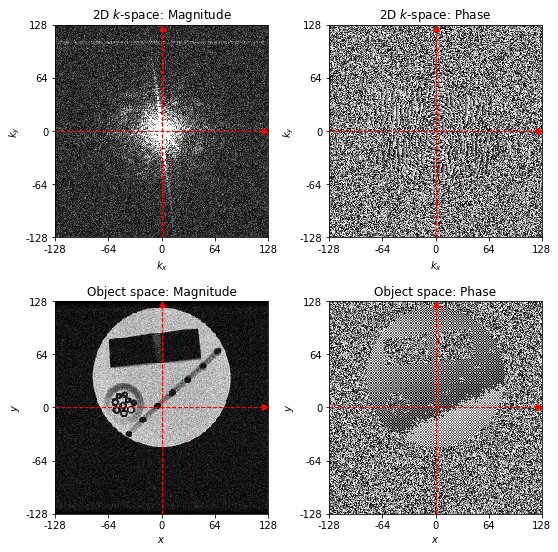

In [3]:
plots(raw)

# 3) Truncated 2D $k$-space and Reconstructed Data: Magnitude and Phase

## 3.1) Truncation of the $k$-space by 1/2

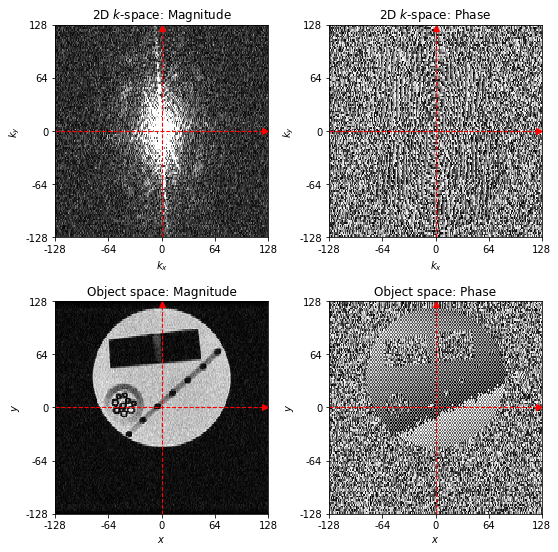

In [4]:
# Truncated 2D k-SPACE DATA by 1/2
raw_trhalf = raw[int(Wky/4):int(3*Wky/4)]

plots(raw_trhalf)

## 3.2) Truncation of the $k$-space by 1/4

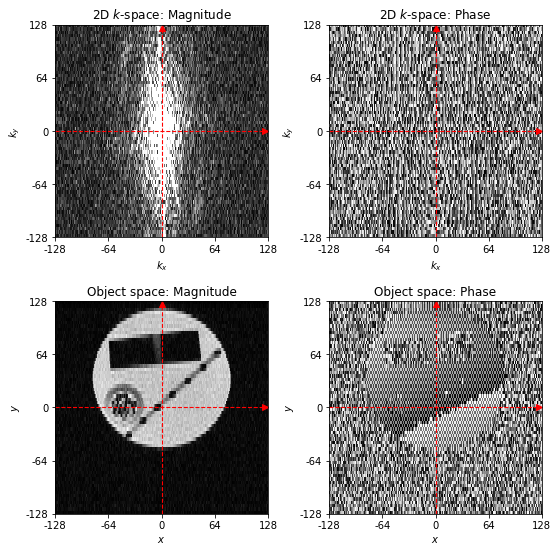

In [5]:
# Truncated 2D k-SPACE DATA by 1/4
raw_fourth = raw[int(3*Wky/8):int(5*Wky/8)]

plots(raw_fourth)

## 3.3) Truncation of the $k$-space by 1/8

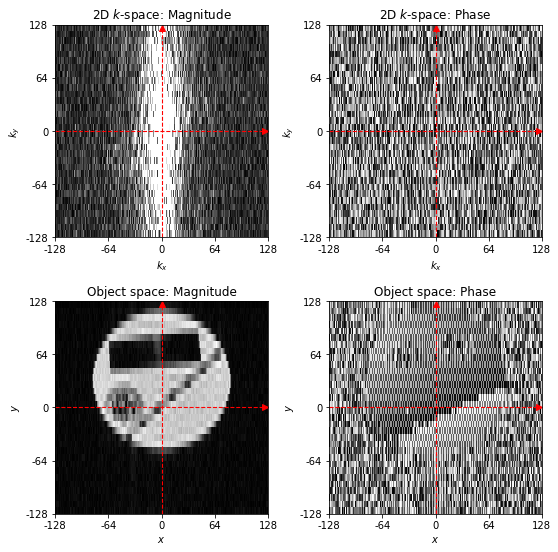

In [6]:
# Truncated 2D k-SPACE DATA by 1/8
raw_eight = raw[int(7*Wky/16):int(9*Wky/16)]

plots(raw_eight)

# 4) Undersampled 2D $k$-space and Reconstructed Data: Magnitude and Phase

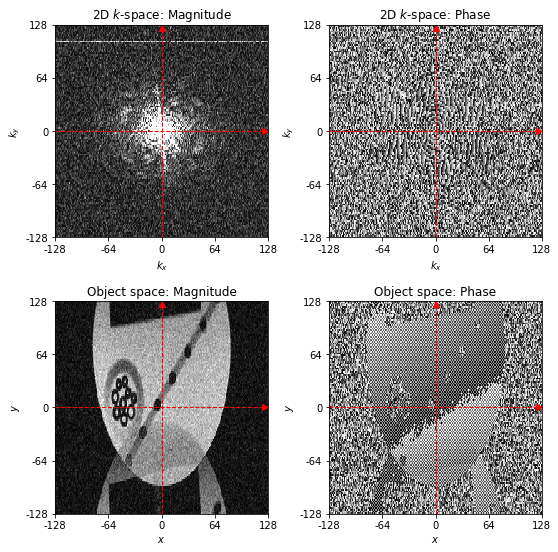

In [7]:
raw_samplinghalf = (raw[0:Wky:2]+raw[1:Wky:2])/2; 
#raw_samplinghalf = raw[0:Wky:2]; 

plots(raw_samplinghalf)

# 5) Half Fourier imaging along the phase-encoding direction - Hermitian symmetry before image reconstruction

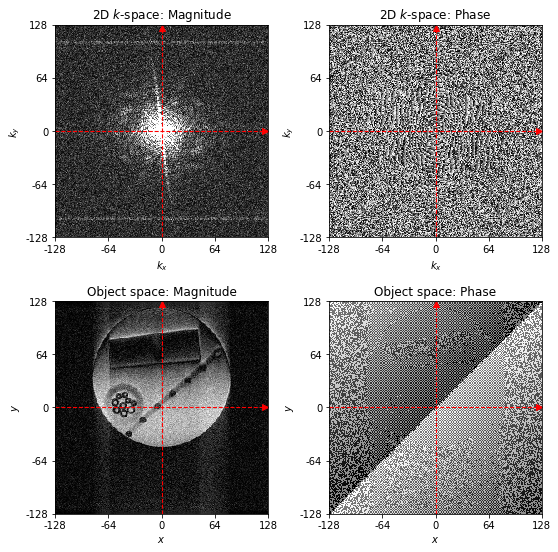

In [8]:
raw_firsthalf = raw[0:int(Wky/2)] 
raw_secondhalf = np.rot90(np.conj(raw_firsthalf), k=2)
raw_hermit = np.concatenate((raw_firsthalf,raw_secondhalf))

plots(raw_hermit)

# 6) 5/8 Partial Fourier Imaging

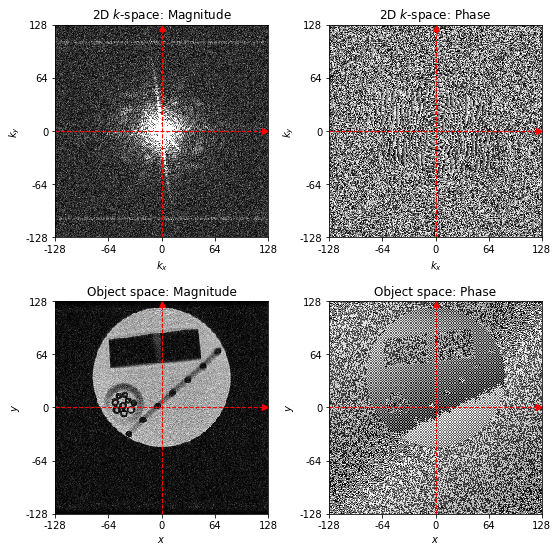

In [12]:
raw_firsthalf = raw[0:int(5*Wky/8)] 
raw_secondhalf = np.rot90(np.conj(raw_firsthalf[0:int(3*Wky/8)]), k=2)
raw_hermit = np.concatenate((raw_firsthalf,raw_secondhalf))

plots(raw_hermit)